In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")

In [3]:
df = transactions.groupby('CustomerID').agg({
    'TotalValue': 'sum', 
    'TransactionDate': 'count', 
    'Quantity': 'sum'
}).reset_index().rename(columns={'TransactionDate': 'TransactionCount'})

In [4]:
df = df.merge(customers, on="CustomerID")

In [5]:
df_cluster = df[['TotalValue', 'TransactionCount', 'Quantity']]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

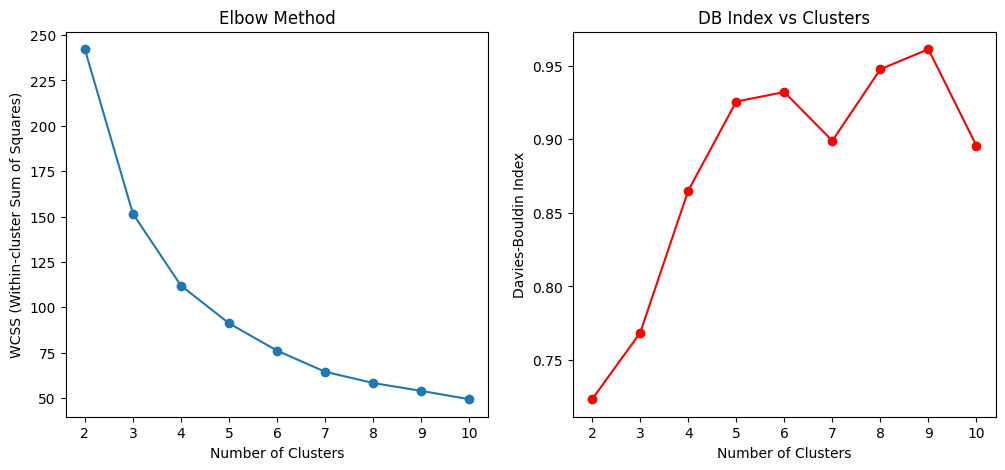

In [6]:
wcss = []
db_scores = []
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_scaled)
    wcss.append(kmeans.inertia_)
    db_scores.append(davies_bouldin_score(df_scaled, labels))

# Plot Elbow Method and DB Index
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(cluster_range, wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS (Within-cluster Sum of Squares)")
plt.title("Elbow Method")

plt.subplot(1, 2, 2)
plt.plot(cluster_range, db_scores, marker='o', color='red')
plt.xlabel("Number of Clusters")
plt.ylabel("Davies-Bouldin Index")
plt.title("DB Index vs Clusters")

plt.show()

In [7]:
optimal_k = cluster_range[np.argmin(db_scores)]  # Select k with lowest DB Index
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_scaled)

db_index = davies_bouldin_score(df_scaled, df['Cluster'])
print(f"Optimal number of clusters: {optimal_k}")
print(f"Davies-Bouldin Index: {db_index:.4f}")

Optimal number of clusters: 2
Davies-Bouldin Index: 0.7234


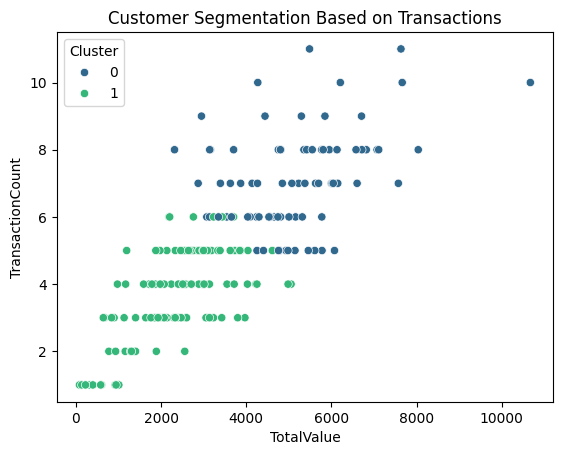

In [8]:
sns.scatterplot(x=df['TotalValue'], y=df['TransactionCount'], hue=df['Cluster'], palette='viridis')
plt.title("Customer Segmentation Based on Transactions")
plt.xlabel("TotalValue")
plt.ylabel("TransactionCount")
plt.show()

In [10]:
df[['CustomerID', 'Cluster']].to_csv("Sanidhya_Yadav_Clustering.csv", index=False)